# Part I - Data Visuaization of Ford Go Bike System
## by Shakiru Olarewaju Olagunju

## Introduction
> This data set includes information about individual rides made in Ford Go Bike system covering the greater San Francisco Bay area, United States. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt
%matplotlib inline

In [2]:
#Import teh dataset
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#Check for the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day                  174952 no

In [4]:
#Check for null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
start_day                  0
start_hour                 0
end_month                  0
end_day                    0
end_hour                   0
duration (min)             0
dtype: int64

In [5]:
#Drop the null values
df = df.dropna(how='any',axis=0) 


In [6]:
#Check the dataframe again to make sure null values have been removed
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
start_day                  0
start_hour                 0
end_month                  0
end_day                    0
end_hour                   0
duration (min)             0
dtype: int64

In [7]:
#Check the sahpe of the dataframe
df.shape

(174952, 23)

In [8]:
#Check dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,duration (min)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,February,Thursday,17,March,Friday,8,869
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,February,Thursday,12,March,Friday,5,1030
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,February,Thursday,17,March,Friday,4,608
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,February,Thursday,23,March,Friday,0,26
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,February,Thursday,23,March,Friday,0,29


In [9]:
# Convert time columns from string to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 23 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day           

In [10]:
# Split start time into month, day and hour

df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

# Split end time into month, day and hour

df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

In [11]:
# Convert duration in seconds to minutes
df['duration (min)'] = df['duration_sec']/60

In [12]:
# Convert data type for convinience
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['duration (min)'] = df['duration (min)'].astype(int)

In [13]:
#Rename df
df = df.rename(columns={'duration (min)': 'duration_min'})

In [14]:
# Check df to see if the column has been renamed to duration_min
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 23 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day           

In [15]:
# Save the cdf.to_csv('baywheels_cleaned.csv', index = False)leaned df 
df.to_csv('fordgobike_clean.csv', index = False)

In [16]:
#Check the shape of the dataframe
df.shape

(174952, 23)

> The dataset has 174,952 rows and 23 columns

### The main features of interest in this dataset are:

> - User Type <br>
> - Trip Duration <br>
> - Start Time and Date <br>
> - End Time and Date <br>
> - Start Station ID <br>
> - End Station ID <br>
> - Start Station Name <br>
> - End Station Name <br>


### The following  features will be intresting for my investigations

> - Start Day <br>
> - Age <br>
> - Member Gender <br>
> - User type <br>
> - Duration <br>

## Univariate Exploration

> In this section, I will investigate distributions of univariate variables. 


###  **What is the most popular start day for bike ride?**

In [17]:
# Generate day of teh week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [18]:
# Creating function for countplot

def bar_plot(df, x_var, order =None, color = 0):
    # set plot dimensions
    plt.figure(figsize = [14,6])
    #if there is no order argument include:
    if not order:
        count = df[x_var].value_counts()
        order = count.index
    sb.countplot(data = df, x = x_var, order = order, color = sb.color_palette()[color])
    x_var =x_var.replace("_", " ") #replace  _ with a space
    #Add title and format it
    plt.title(f'''Distribution of {x_var}'''.title(), fontsize = 14, weight = "bold")
    #Add x_label and format it   
    plt.xlabel(x_var.title(), fontsize = 10, weight = "bold")
    #Add y lavbel and format it
    plt.ylabel('Frequency'.title(),fontsize = 10, weight = "bold")
    #despine
    sb.despine()


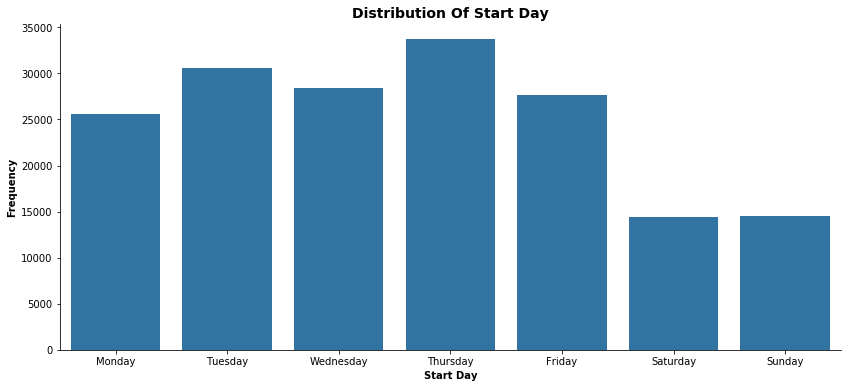

In [19]:
#Bike Daily Usage
bar_plot(df, 'start_day', order = day_order);

> Thursday is the most popular day of the week for bike usage. 

In [20]:
# Describe the duration column
df['duration_min'].describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

### **What is the distribution of ride duration?**

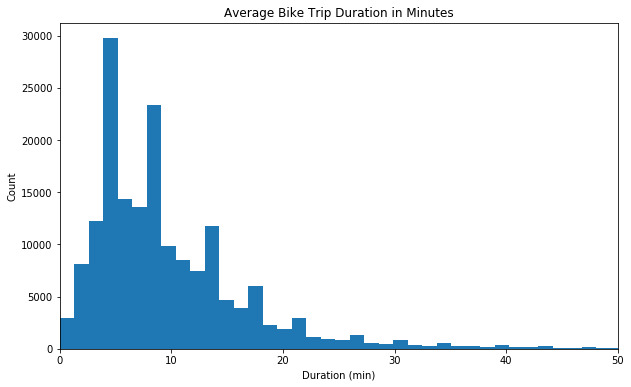

In [21]:
#Plot the distribution of the ride in minutes
plt.figure(figsize=(10,6))
bins = np.arange(0 , df['duration_min'].max()+3, 1.3)
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Average Bike Trip Duration in Minutes')
plt.xlim([0, 50]);

- The distribution of the bike duration in minutes shwows multimodal distribution

### - **How many users of the bike?**

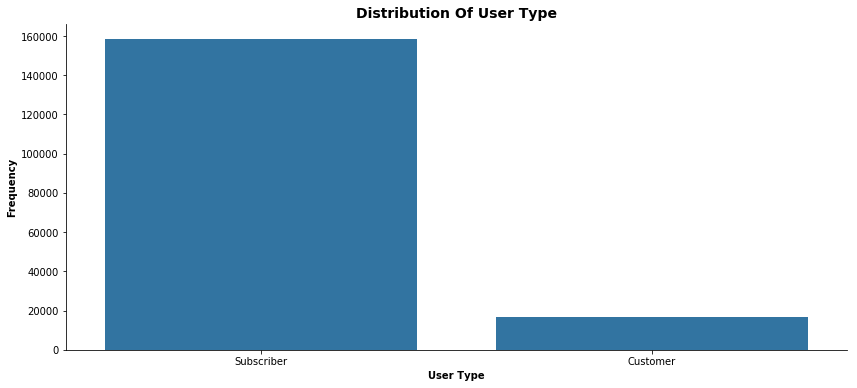

In [22]:
#Count of bike users

bar_plot(df, 'user_type')


### **What is the percentage user of bikes?**

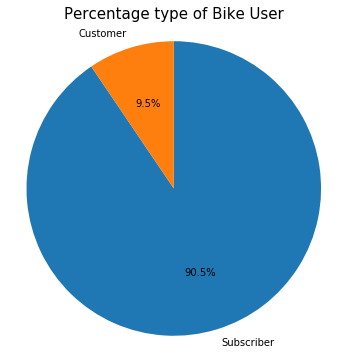

In [23]:
# Bike user type by percentage
counts = df['user_type'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(counts, labels = counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Percentage type of Bike User', fontsize=15);


### - **What are the population of the gender of the bike users?**

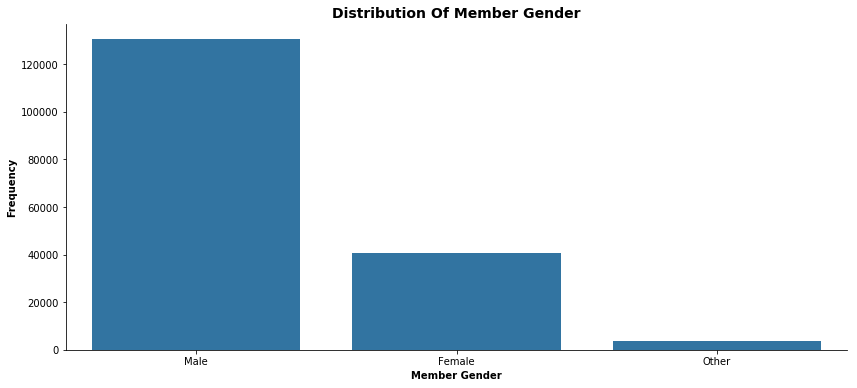

In [24]:
#Count of the genders
bar_plot(df, 'member_gender', )

### **What is the percentage Gender of the bike user?**

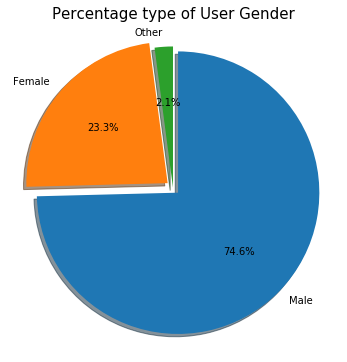

In [25]:
# plot a pie chart
counts = df['member_gender'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(counts, explode =  (0.05, 0.05,0), labels = counts.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Percentage type of User Gender', fontsize=15)
plt.show();

> The countplot was not showing conving visualisization of the bike users. I plotted histogram to show their percebtage as part of transformmation


## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my 
data.

In [26]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,February,Thursday,17,March,Friday,8,869
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,February,Thursday,12,March,Friday,5,1030
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,February,Thursday,17,March,Friday,4,608


- I would like to extratc the age of bike users to see the correlation between the age of the riders and how long they spend riding

In [27]:
# Create age column and check the dataset for the new column
df['age'] = df['member_birth_year'].apply(lambda z: 2022 - z)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 24 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_day           

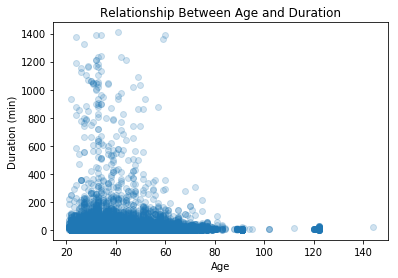

In [28]:
# Relationship between age and distance ride in minutes
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha=1/5)
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.title('Relationship Between Age and Duration')
plt.show();

- There are a lot of bike users between the age of 20 and 60 years and they travel less than 200 minutes. However there is no noticeable relationship between age and the duration of cycling.

### - **What are the relationships between the type of users on the duration of journey?**

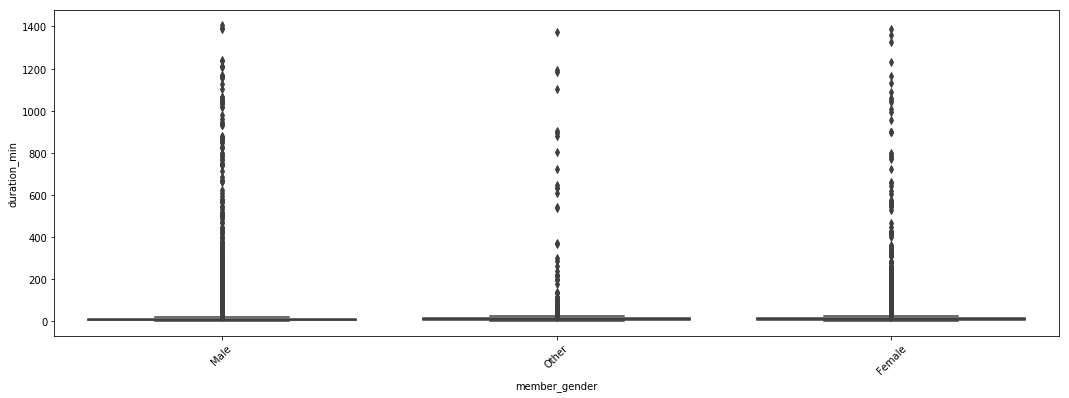

In [29]:
#Use boxplot to visualise the relationship of the users by duration in minutes
plt.figure(figsize = [18, 6])
base_color = sb.color_palette()[0]
#box plot
sb.boxplot(data=df, x='member_gender', y='duration_min', color=base_color)
plt.xticks(rotation=45);

- It is difficult to make sense of our chart, let zoom the minutes to 50 minutes because that seems like average minutes of cycling

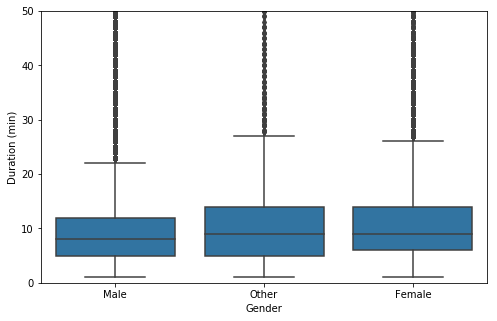

In [30]:
# Explode the boxplot
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 50])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.show();

- The number of male cyclers is significantly larger than that of others and female cyclers, but boxplot showed that female and other riders cycle for longer period of time when comapred to men.

### - **Relationship between user gender and duration of cycling**?

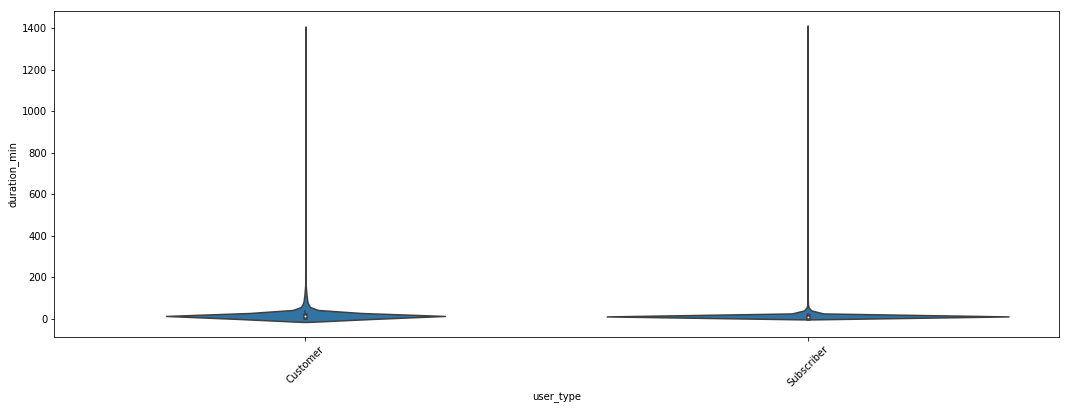

In [31]:
#USe violin plot tto extract relationship between gender and riders
plt.figure(figsize = [18, 6])
base_color = sb.color_palette()[0]

#box plot
sb.violinplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.xticks(rotation=45);

Lets zoom the violin plot

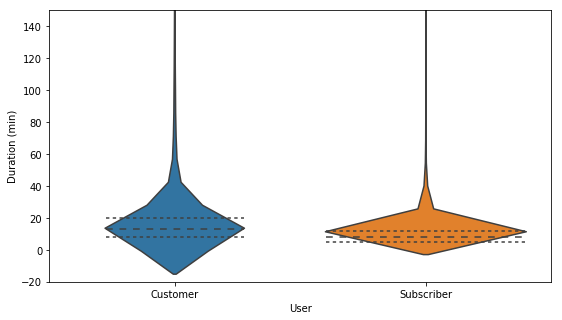

In [32]:
# Lets zoom the violin plot
plt.figure(figsize = [9, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'user_type', y = 'duration_min', inner='quartile')
plt.ylim([-20, 150])
plt.xlabel('User')
plt.ylabel('Duration (min)')
plt.show();

- Contumers take longer ride than subscribers. This is understandable becasue costumers would have tendency to want to maximise their rental feel, subscribers on the other hand can cycle consistemtly but for shorter duration

### - **What is the daily count of bike users?**

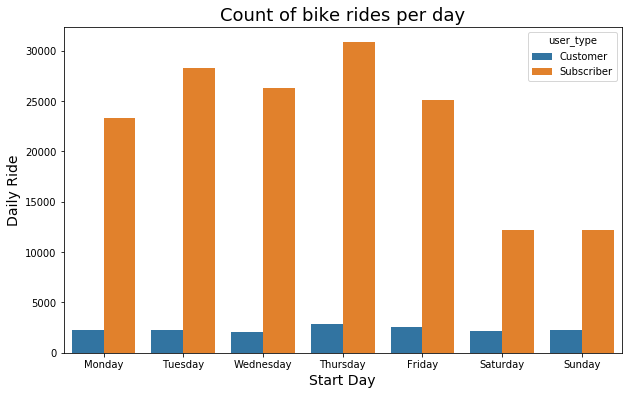

In [33]:
#Plot the daily count of bike users
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='start_day', hue ='user_type', order = day_order)
plt.xlabel('Start Day', fontsize=14)
plt.ylabel('Daily Ride', fontsize=14)
plt.title('Count of bike rides per day', fontsize=18);

- Thursday is the busiest day for starting cycling and there is not much difference between saturday and sunday, understanble because it is weekend and people are using bikes to go to work.

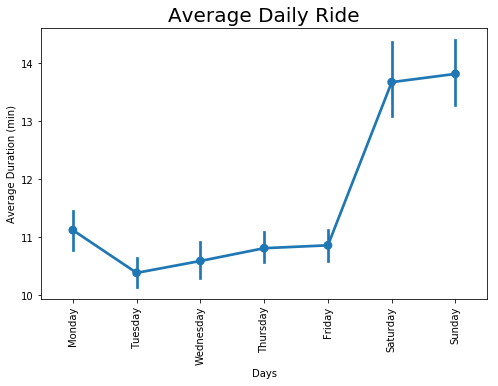

In [34]:
#Check average minutes of cycling per day
plt.figure(figsize = (8, 5))
sb.pointplot(data = df, x = 'start_day', y = 'duration_min', order = day_order)
plt.xticks(rotation = 90)
plt.title('Average Daily Ride', fontsize = 20)
plt.ylabel('Average Duration (min)')
plt.xlabel('Days');

> While more people ride bicycle on weekdays, people spend more minute cycling on weekends (Saturday & Sunday)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was suprised to find out that consumers take longer ride than subscribers. Even though there are more consumers than subscribers. But it is understanbale because consumers would have tendency to want to maximise their rental feel, subscribers on the other hand can cycle consistently for shorter duration


> The number of male cyclers is significantly larger than that of others and female cyclers, but chart showed that female and other riders cycle for longer period of time when comapred to male.


> You would think there is a less cycling on weekends because less number of people cycle. However people spend more minutes cycling on weekends. Less people, but more minutes. Quite interesting.



## Multivariate Exploration

> I will create plots of three or more variables to investigate my data even
further.

### - **What is the relationship between gender, age and cycling period?**

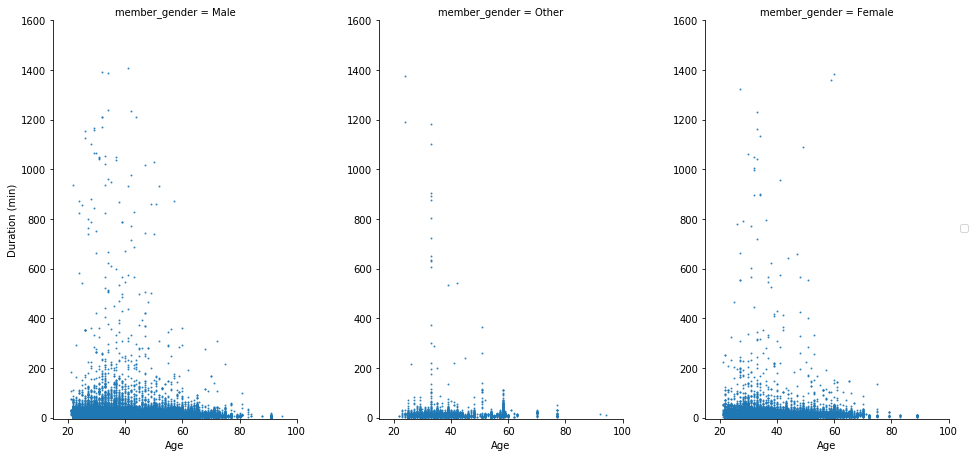

In [35]:
#Use FacetGrid and scatterplot to show the relatinship between age, gender and duration of ride

df_1 = sb.FacetGrid(data = df, col = 'member_gender',  xlim = [15, 100], ylim = [-5, 1600])
df_1.map_dataframe(sb.regplot, 'age', 'duration_min', fit_reg=False, scatter_kws ={'s':1})
df_1.set_axis_labels('Age', 'Duration (min)')
df_1.add_legend()
## Set Plot Dimensions
df_1.fig.set_size_inches(14, 8);
plt.show();


In [36]:
df['duration_min'].describe(np.arange(0.95, 1, 0.001)).to_frame().T

,count,mean,std,min,50%,95%,95.1%,95.2%,95.3%,95.4%,...,99.2%,99.3%,99.4%,99.5%,99.6%,99.7%,99.8%,99.9%,100%,max
duration_min,174952.0,11.241461,27.371269,1.0,8.0,25.0,25.0,25.0,26.0,26.0,...,59.0,65.0,72.294,83.245,100.0,122.0,168.098,332.0,1409.0,1409.0


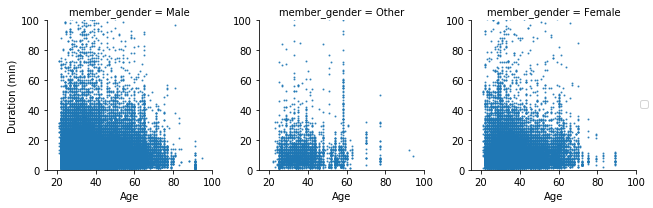

In [37]:
#Use FacetGrid and scatterplot to show the relatinship between age, gender and duration of ride

df_1 = sb.FacetGrid(data = df, col = 'member_gender',  xlim = [15, 100], ylim = [0, 100])
df_1.map_dataframe(sb.regplot, 'age', 'duration_min', fit_reg=False, scatter_kws ={'s':1})
df_1.set_axis_labels('Age', 'Duration (min)')
df_1.add_legend()
plt.show();

> Male between the age of 20 and 80 usually cycle for around 100 minutes. There are some outliers <br>

> Others of age 22 to 60 years are very active with cycling, tghey cycle for aaround 40 minutes <br>

> Female of age 20 to 60 years show similar cycling tendency to male but they cycle for lesser minutes

### -**How does cycling compare in terms of users by genders?**

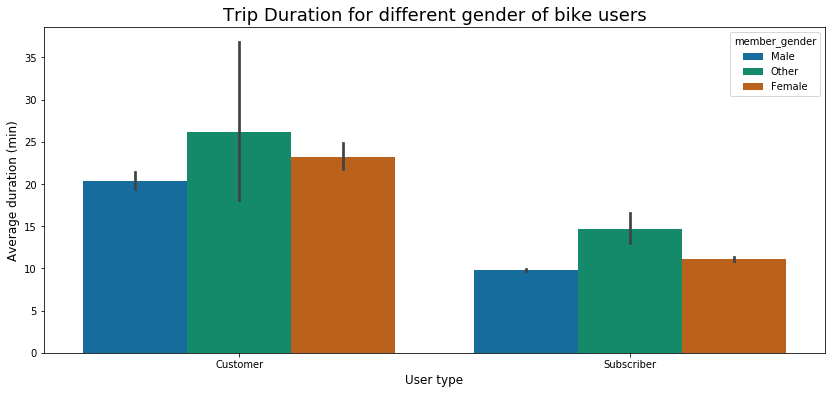

In [38]:
#PLot distance cycle by gender and user type
plt.figure(figsize= (14,6))
sb.barplot(data=df, x='user_type', y='duration_min', hue='member_gender', palette='colorblind')
plt.xlabel('User type', fontsize= 12)
plt.ylabel('Average duration (min)', fontsize= 12)
plt.title('Trip Duration for different gender of bike users', fontsize= 18);



> As stated earlier from violin plot, customer types of users travel more on an average. <br>

> Interestingly, other type of users travel more than both customer and subscribers.

- Other gender types in both customer and subscribe travels the most on average. <br>
- Overall, customer trips take more time

- Lets explore this further

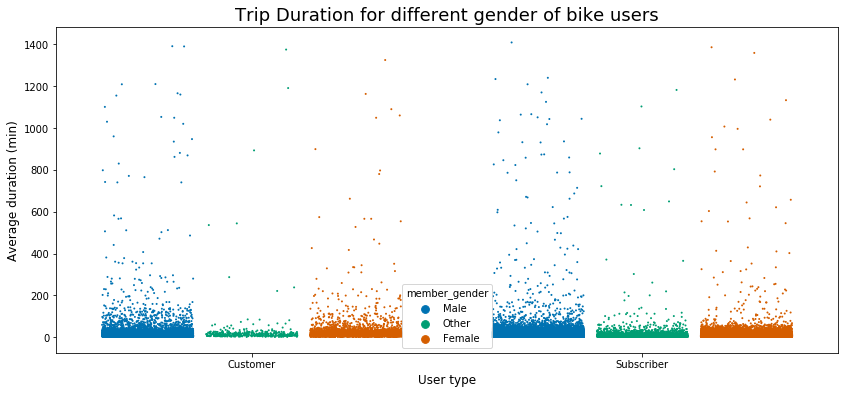

In [39]:
#PLot distance cycle by gender and user type
plt.figure(figsize= (14,6))
sb.stripplot(data=df, x='user_type', y='duration_min', hue='member_gender', palette='colorblind', size=2, jitter=0.35, dodge =True)
plt.xlabel('User type', fontsize= 12)
plt.ylabel('Average duration (min)', fontsize= 12)
plt.title('Trip Duration for different gender of bike users', fontsize= 18);

- There are so much outliers, the outliers made it look like other gender ride more time than male and felmale customers. <br>

- MAle customers on average cycle more than females

## Conclusions
> I explore the FORD GOBIKE dataset to create insights. First thing I did was cleaning my data to extrar more information from the dataset. I extarted month, day and hour of the bike ride. I needed this info for analysis. I also extracted the age of cyclers <br>

> - From the two types of distinct users, customer users spend more time cycling than subscribers. Of the three types of genders, other gender spend more time cycling than male and felame, evem though there are more male riders.

> - Generally, across all the genders and subscribers, 20 to 50 years old are very active riders <br>

> - Eventhough, thursday is the busiest day for cycling, people tend to ride longer on weekends <br>

> - Male subscribers cycle more than female and other genders, even though there are a lot of outliers
